In [50]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv("Sales prediction cleaned dataset.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [52]:
X= df.drop("Sales",axis=1)
y = df["Sales"]


In [53]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [54]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

# modelling

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=True)

In [56]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [57]:
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_)

Intercept: 4.63762444239792
Coefficient: [ 0.05507865  0.10308563 -0.00090115]


In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# prediction

In [59]:
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)


# evalution

In [60]:
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Train R2:",r2_score(y_train,ypred_train))
print("Test r2:",r2_score(y_test,ypred_test))
print("Cross validation score:",cross_val_score(model,x_train,y_train,cv = 5,scoring = "r2").mean())
      

Train RMSE: 1.670441324568007
Test RMSE: 1.5522028259516758
Train R2: 0.905486333977187
Test r2: 0.8747226291661847
Cross validation score: 0.8929169557620972


# checking assumpation of the linear regression 

# linearity of errors

Text(0, 0.5, 'Error values')

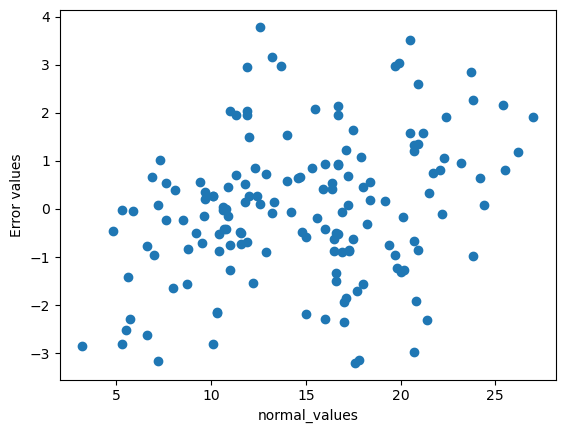

In [70]:
Train_error = y_train - ypred_train
plt.scatter(x= y_train,y=Train_error)
plt.xlabel("normal_values")
plt.ylabel("Error values")

# normality of errors

In [72]:
Train_error.skew()

0.07950975035578922

# equal variance of errors

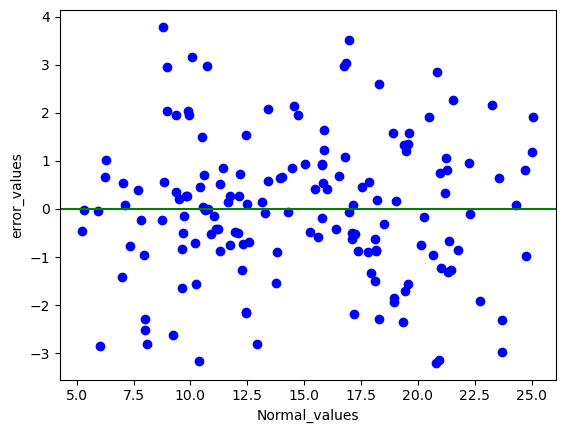

In [76]:
plt.scatter(ypred_train,Train_error,c= "b")
plt.axhline(y=0,color="green")
plt.xlabel("Normal_values")
plt.ylabel("error_values")
plt.show()

# model summary

In [61]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size = 0.8,random_state = True)
import statsmodels.formula.api as smf
L1  = smf.ols("y_train~x_train",data =df_train).fit()
L1.summary()
              

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     498.2
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.17e-79
Time:                        23:14:53   Log-Likelihood:                -309.12
No. Observations:                 160   AIC:                             626.2
Df Residuals:                     156   BIC:                             638.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6376      0.335     13.829      0.000       3.975       5.300
x_train[0]     0.0551      0.002     35.836      0.000       0.052       0.058
x_train[1]     0.1031      0.010     10.656      0.000       0.084       0.122
x_train[2]    -0.0009      0.007     -0.129      0.898      -0.015       0.013
==============================================================================
Omnibus:                       16.943   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.784
Skew:                          -0.532   Prob(JB):                     5.62e-07
Kurtosis:                       4.784   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
sm.graphics.plot_partregress_grid(L1)
plt.show()

* from the model summary and the regression plot i observed that the newspaper having no correlation with the sales so i am droping that 

# checking the influenctial plot 

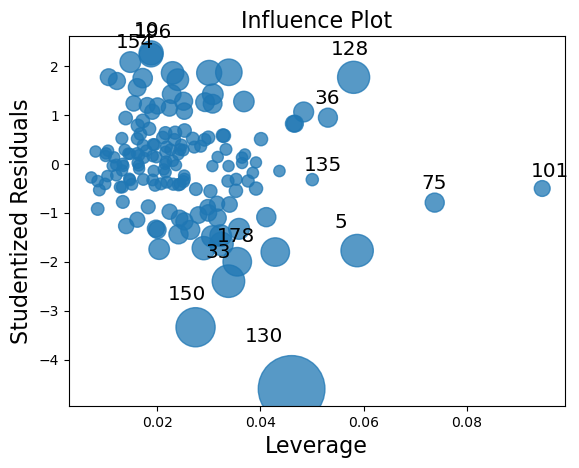

In [64]:
sm.graphics.influence_plot(L1)
plt.show()

# from above influence plot i found some outliers .so i am drop it when model performs well

# data preprocessing again after assumpation generated

In [65]:
df1 = df.drop("Newspaper",axis = 1)
df1.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9


In [66]:
df1.drop(index = [128,130,196,154,150,178,33],inplace = True)

In [67]:
X1=df1.drop(columns = ["Sales"])
y1 = df1["Sales"]

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X1,y1,train_size=0.8,random_state=True)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_)
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Train R2:",r2_score(y_train,ypred_train))
print("Test r2:",r2_score(y_test,ypred_test))
print("Cross validation score:",cross_val_score(model,x_train,y_train,cv = 5,scoring = "r2").mean())
      

Intercept: 4.553019287818437
Coefficient: [0.05484614 0.10916572]
Train RMSE: 1.4723714770612246
Test RMSE: 1.310986674385686
Train R2: 0.9224392701736631
Test r2: 0.922687947750424
Cross validation score: 0.9167903602626583
